In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import re
from sklearn.impute import SimpleImputer
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)             

In [2]:
data = pd.read_csv('EDA (1).csv')

data2 = pd.read_csv('EDA_final.csv')

df_distributor = pd.read_csv('train_films_distributors.csv')

df = data.copy()

df2 = data2.copy()

In [3]:
df2.shape



(3789, 25)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_allocine            3789 non-null   int64  
 1   title                  3789 non-null   object 
 2   release_year           3789 non-null   int64  
 3   original_title         0 non-null      float64
 4   genres                 3789 non-null   object 
 5   duration_m             3789 non-null   int64  
 6   synopsis               3789 non-null   object 
 7   poster_link            3789 non-null   object 
 8   release_date           3789 non-null   object 
 9   societies              3789 non-null   object 
 10  budget                 3789 non-null   object 
 11  nationality            3789 non-null   object 
 12  directors              3789 non-null   object 
 13  all_director_oscars    11 non-null     float64
 14  all_actor_oscars       539 non-null    float64
 15  acto

In [5]:
df2.dtypes.value_counts()

float64    12
object      9
int64       4
Name: count, dtype: int64

In [6]:
df2.head(1)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,budget,nationality,directors,all_director_oscars,all_actor_oscars,actor_celebs,actor_celebs_by_year,entries_mean_actor,entries_sum_actor,entries_mean_director,entries_sum_director,entries_mean_composer,entries_sum_composer,jpbox_copies,entries
0,5818,Titanic,1998,NaN,"Drame,Romance",194,"Southampton, 10 avril 1912. Le paquebot le plu...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-01-07,Industrial Light & Magic (ILM)|Paramount Pictu...,200000000$,U.S.A.,James Cameron,NaN,NaN,8.0,38.0,1668807.0,164059823.0,0.0,0.0,0.0,0.0,564.0,498212


<Axes: >

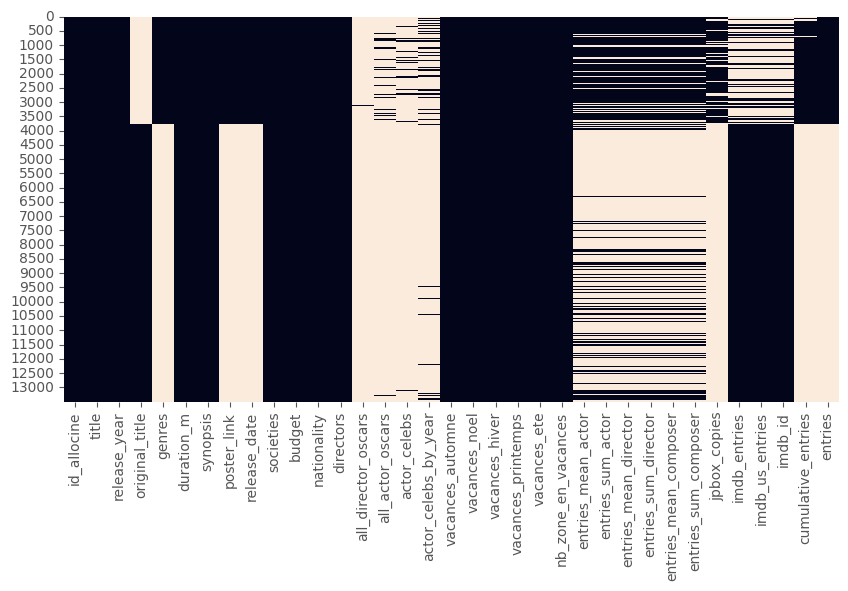

In [7]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False)

In [8]:

df2 = df2.merge(df_distributor[['title', 'distributor']], on='title', how='left')

In [9]:
colonnes_a_supprimer = ['id_allocine', 'release_year', 'original_title', 'poster_link', 'budget', 'societies','entries_mean_director', 'entries_sum_director', 'entries_mean_composer', 'entries_sum_composer']
df_model = df2.drop(colonnes_a_supprimer, axis=1)

In [10]:


df_model.head(1)

,title,genres,duration_m,synopsis,release_date,nationality,directors,all_director_oscars,all_actor_oscars,actor_celebs,actor_celebs_by_year,entries_mean_actor,entries_sum_actor,jpbox_copies,entries,distributor
0,Titanic,"Drame,Romance",194,"Southampton, 10 avril 1912. Le paquebot le plu...",1998-01-07,U.S.A.,James Cameron,NaN,NaN,8.0,38.0,1668807.0,164059823.0,564.0,498212,The Walt Disney Company France


In [11]:
df_model['all_director_oscars'] = df_model['all_director_oscars'].fillna(0)
df_model['all_actor_oscars'] = df_model['all_actor_oscars'].fillna(0)
df_model['actor_celebs'] = df_model['actor_celebs'].fillna(0)
df_model['actor_celebs_by_year'] = df_model['actor_celebs_by_year'].fillna(0)

In [12]:
df_model['entries_mean_actor'] = df_model['entries_mean_actor'].fillna(0)
df_model['entries_sum_actor'] = df_model['entries_sum_actor'].fillna(0)


<Axes: >

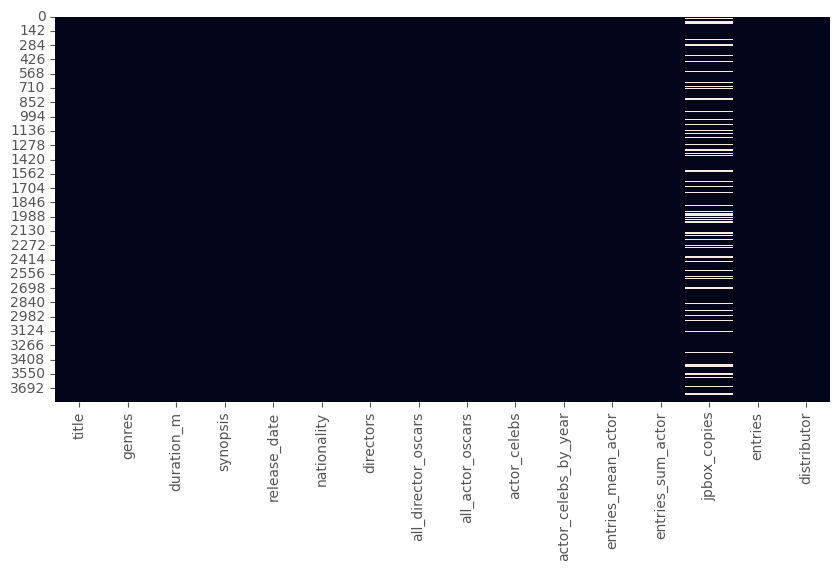

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_model.isna(), cbar=False)


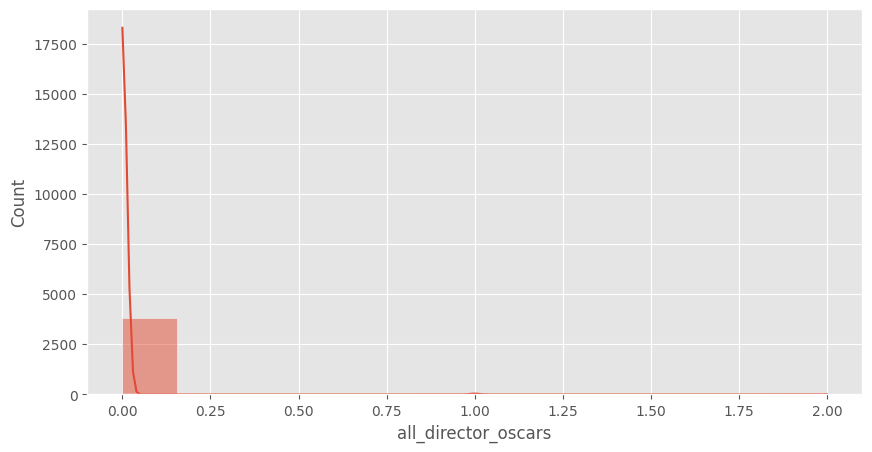

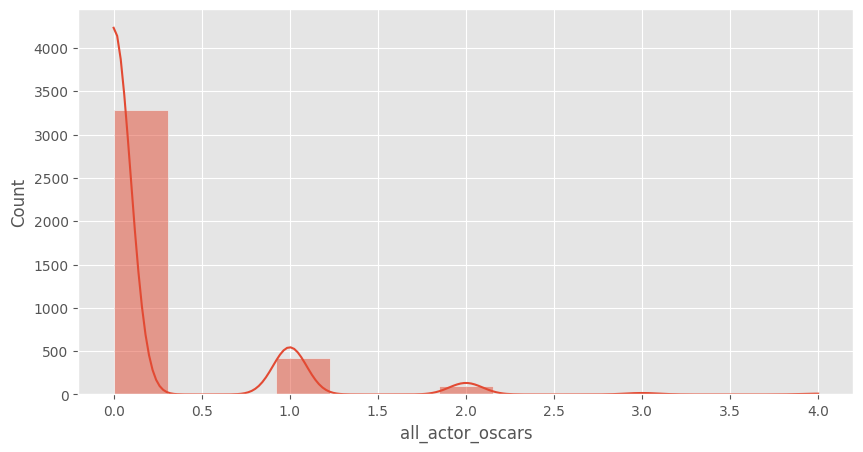

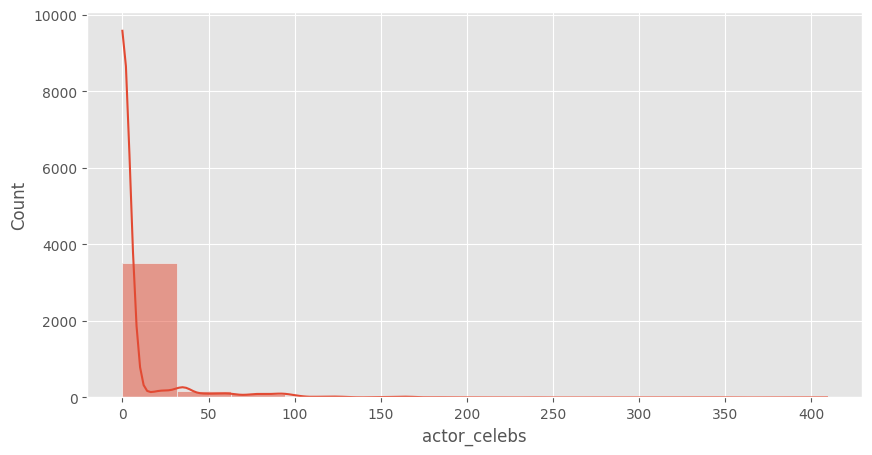

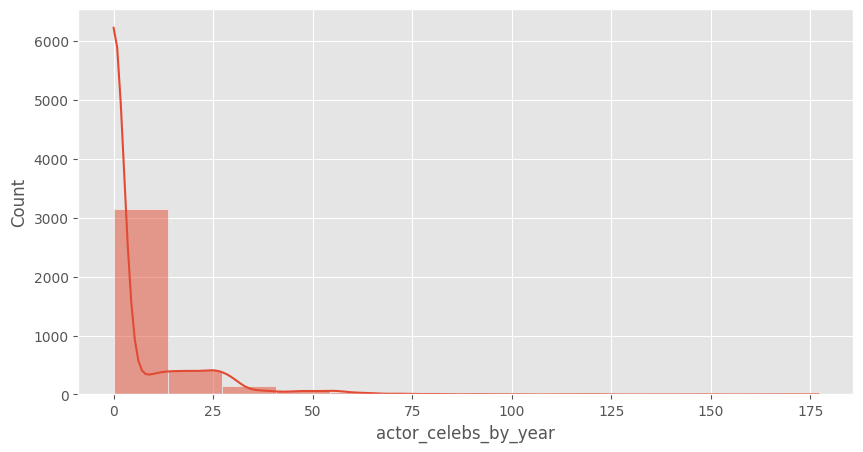

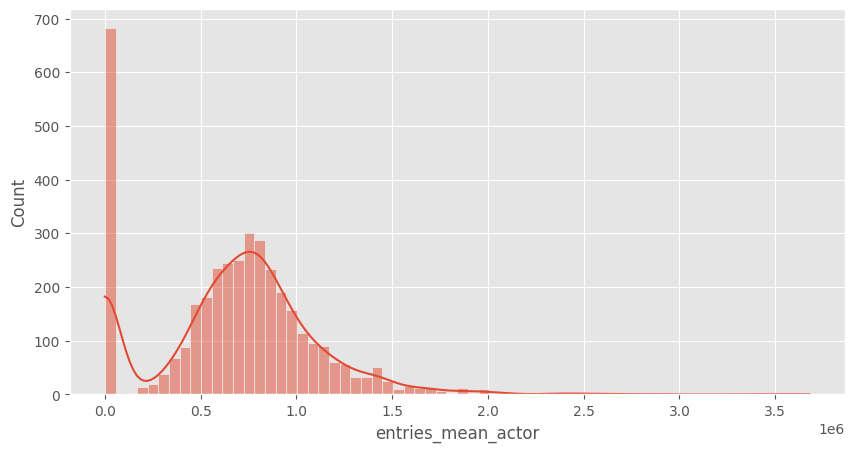

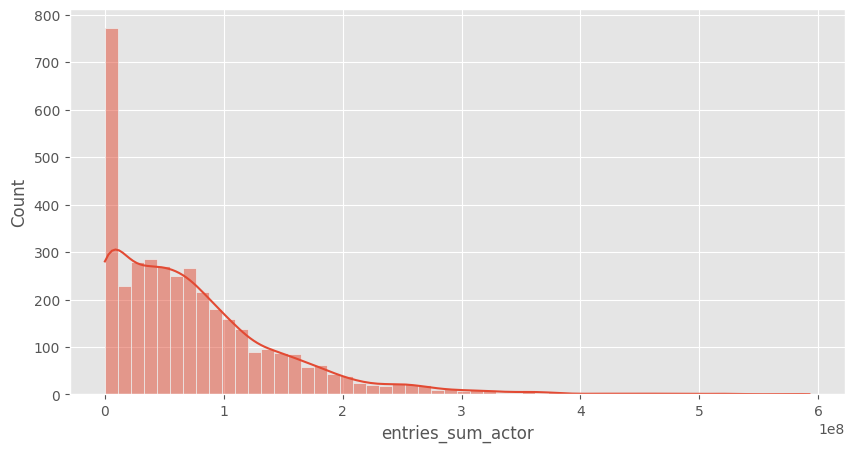

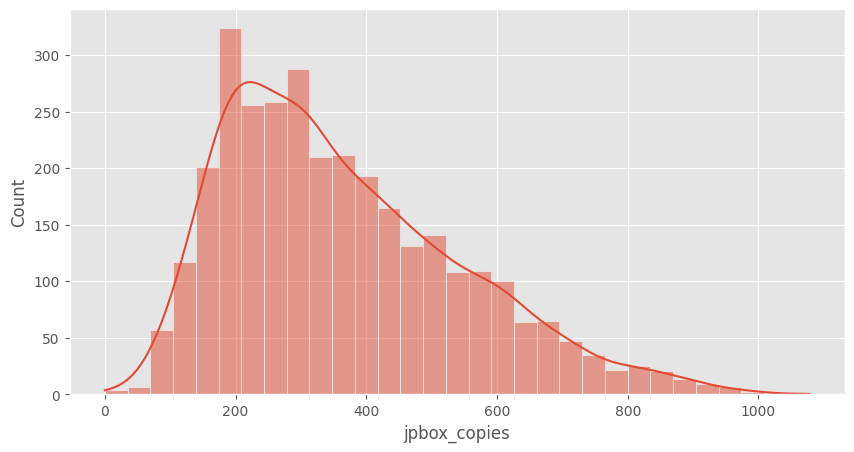

In [14]:
for col in df_model.select_dtypes('float'):
    plt.figure(figsize=(10, 5))
    sns.histplot(df_model[col], kde=True)

In [15]:
from sklearn.impute import SimpleImputer

# # Créer un imputeur avec une stratégie de remplissage constante
# fill_value = 200  # Remplacez par la valeur que vous souhaitez utiliser
# imputer = SimpleImputer(strategy='constant', fill_value=fill_value)

# Créer un imputeur avec une stratégie de remplissage
imputer = SimpleImputer(strategy='most_frequent')

# Sélectionnez la colonne à imputer
X_impute = df_model[['jpbox_copies']]

# Imputez les valeurs manquantes dans la colonne 'jpbox_copies' avec la médiane
X_imputed = imputer.fit_transform(X_impute)

# Remplacez les valeurs imputées dans le dataframe
df_model['jpbox_copies'] = X_imputed

In [16]:
# Select float columns
float_cols = df_model.select_dtypes(include=['float64']).columns

# Convert float columns to int
df_model[float_cols] = df_model[float_cols].astype(int)

In [17]:
# Select categorical columns
categorical_cols = df_model.select_dtypes(include=['object']).columns

print(categorical_cols)

Index(['title', 'genres', 'synopsis', 'release_date', 'nationality',
       'directors', 'distributor'],
      dtype='object')


In [18]:
df_model.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 3825 non-null   object
 1   genres                3825 non-null   object
 2   duration_m            3825 non-null   int64 
 3   synopsis              3825 non-null   object
 4   release_date          3825 non-null   object
 5   nationality           3825 non-null   object
 6   directors             3825 non-null   object
 7   all_director_oscars   3825 non-null   int64 
 8   all_actor_oscars      3825 non-null   int64 
 9   actor_celebs          3825 non-null   int64 
 10  actor_celebs_by_year  3825 non-null   int64 
 11  entries_mean_actor    3825 non-null   int64 
 12  entries_sum_actor     3825 non-null   int64 
 13  jpbox_copies          3825 non-null   int64 
 14  entries               3825 non-null   int64 
 15  distributor           3825 non-null   

In [27]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Divide the dataset into training and test sets
X = df_model.drop('entries', axis=1)  # Remove the target column to get the features
y = df_model['entries']  # Select the target column

# Divide the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = ['title', 'genres' ,'synopsis', 'release_date', 'nationality','directors', 'distributor']

# Convert categorical feature names to indices
cat_features_indices = [X.columns.get_loc(c) for c in cat_features if c in X]

# Define the preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        # ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', cat_features)
    ])

# Define the pipeline
steps = [
    # ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(cat_features=cat_features_indices, verbose=0, iterations=300, learning_rate=0.1))
]

pipeline = Pipeline(steps)

# Train the pipeline (the pipeline will perform standardization on the training data)
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print('R2 score:', r2)

R2 score: 0.6007814015894415


In [21]:


# # # unique_genres = pd.Series(np.concatenate(df['genres'].dropna().str.split(','))).unique()

# # # unique_genres

# # Split the genres column into multiple rows
# df_genres = df2['genres'].str.split(',', expand=True).stack()

# # Create dummy variables
# df_genres_dummies = pd.get_dummies(df_genres, prefix='genre').groupby(level=0).sum()

# # Join the dummy variables to the original dataframe
# df2 = df2.join(df_genres_dummies)


# df2 = df2.drop('genres', axis=1)
# colonnes_a_supprimer = ['id_allocine', 'release_year', 'original_title', 'poster_link', 'budget']
# df2 = df2.drop(colonnes_a_supprimer, axis=1)



# # Split the genres column into multiple rows
# df2_genres = df2['societies'].str.split('|', expand=True).stack()

# # Create dummy variables
# df2_genres_dummies = pd.get_dummies(df2_genres, prefix='societies').groupby(level=0).sum()

# # Join the dummy variables to the original dataframe
# df2 = df2.join(df2_genres_dummies)

# df2 = df2.drop('societies', axis=1)
 
#  # Replace "|" with "," in the nationalities column
# df2['nationality'] = df2['nationality'].str.replace('|', ',')

# # Split the nationalities column into multiple rows
# df_nationalities = df2['nationality'].str.split(',', expand=True).stack()

# # Create dummy variables
# df_nationalities_dummies = pd.get_dummies(df_nationalities, prefix='nation').groupby(level=0).sum()

# # Join the dummy variables to the original dataframe
# df2 = df2.join(df_nationalities_dummies)

# df2 = df2.drop('nationality', axis=1)

# df2.head()


# sns.heatmap(df2.isna(), cbar=False)

# df2['all_director_oscars'] = df2['all_director_oscars'].fillna(0)
# df2['all_actor_oscars'] = df2['all_actor_oscars'].fillna(0)
# df2['actor_celebs'] = df2['actor_celebs'].fillna(0)
# df2['actor_celebs_by_year'] = df2['actor_celebs_by_year'].fillna(0)
# # df_model['entries_mean_actor'] = df_model['entries_mean_actor'].fillna(0)
# # df_model['entries_sum_actor'] = df_model['entries_sum_actor'].fillna(0)
# # df_model['entries_mean_director'] = df_model['entries_mean_director'].fillna(0)
# # df_model['entries_sum_director'] = df_model['entries_sum_director'].fillna(0)
# # df_model['entries_mean_composer'] = df_model['entries_mean_composer'].fillna(0)
# # df_model['entries_sum_composer'] = df_model['entries_sum_composer'].fillna(0)

# df2.dropna(subset=['entries_mean_actor'], inplace=True)
# df2.dropna(subset=['entries_sum_actor'], inplace=True)
# df2.dropna(subset=['entries_mean_director'], inplace=True)
# df2.dropna(subset=['entries_sum_director'], inplace=True)
# df2.dropna(subset=['entries_mean_composer'], inplace=True)
# df2.dropna(subset=['entries_sum_composer'], inplace=True)



# df2.dropna(subset=['genre_0'], inplace=True)

# df2.head(1)



In [22]:
for column in df2.columns:
    print(column, df2[column].dtype)

id_allocine int64
title object
release_year int64
original_title float64
genres object
duration_m int64
synopsis object
poster_link object
release_date object
societies object
budget object
nationality object
directors object
all_director_oscars float64
all_actor_oscars float64
actor_celebs float64
actor_celebs_by_year float64
entries_mean_actor float64
entries_sum_actor float64
entries_mean_director float64
entries_sum_director float64
entries_mean_composer float64
entries_sum_composer float64
jpbox_copies float64
entries int64
distributor object


In [23]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False)



all_director_oscars      99.896289
actor_celebs             95.673754
all_actor_oscars         95.214460
actor_celebs_by_year     90.880806
jpbox_copies             76.472331
cumulative_entries       73.353582
release_date             72.086821
entries                  72.086821
poster_link              72.086821
genres                   72.086821
entries_sum_composer     61.315653
entries_mean_composer    61.315653
entries_sum_director     61.315653
entries_mean_director    61.315653
entries_sum_actor        61.315653
entries_mean_actor       61.315653
original_title           27.913179
imdb_entries             17.682791
imdb_us_entries          17.682791
imdb_id                  17.682791
nb_zone_en_vacances       0.000000
id_allocine               0.000000
vacances_ete              0.000000
vacances_printemps        0.000000
vacances_hiver            0.000000
vacances_noel             0.000000
title                     0.000000
directors                 0.000000
nationality         

### Nettoyage données

9731

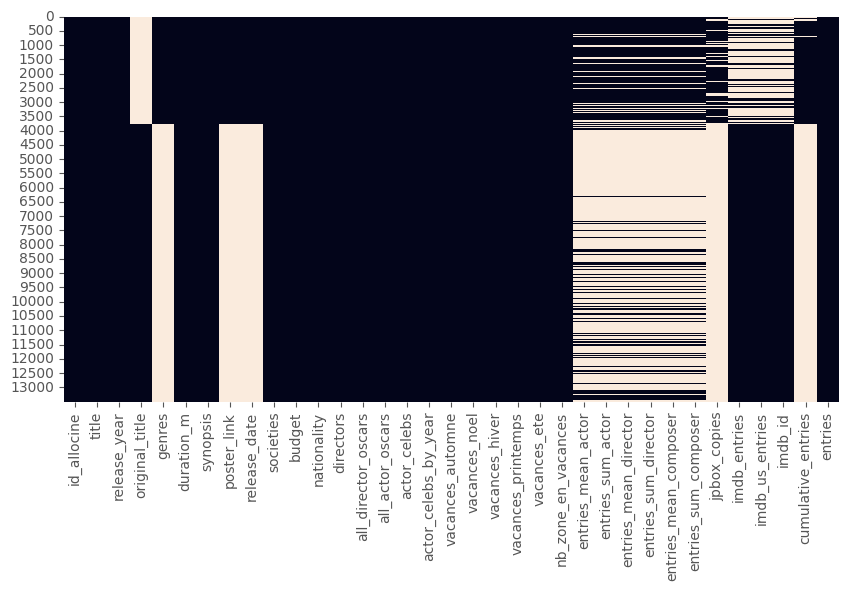

In [24]:
# changer Nan en 0

columns = ['all_director_oscars', 'actor_celebs', 'all_actor_oscars', 'actor_celebs_by_year']
df[columns] = df[columns].fillna(0)

#remplacer les valeurs manquantes dans la colonne entries par les valeurs de la colonne imdb_entries

df['entries'] = df['entries'].fillna(df['imdb_entries'])

(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False)

nan_release_date_titles = (df[df['release_date'].isna()]['title'])

nan_release_date_titles

num_nan = df['release_date'].isna().sum()

num_nan

In [25]:
from fuzzywuzzy import fuzz
from itertools import combinations

def find_similar_titles(df, threshold=80):
    titles = df['title'].dropna().unique()  # drop NaN and get unique titles
    pairs = combinations(titles, 2)  # get all combinations of titles
    similar_titles = [(a, b) for a, b in pairs if fuzz.ratio(a, b) > threshold]
    return similar_titles

# Use the function
similar_titles = find_similar_titles(df, threshold=80)

/home/utilisateur/Documents/dev_ia/NIAB/venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


KeyboardInterrupt: 

In [ ]:
#ligne répétee
df.duplicated().sum()

0

In [ ]:
import textdistance
import numpy as np
from sklearn.cluster import DBSCAN

def cluster_titles(df, threshold=0.8):
    titles = df['title'].dropna().unique()  # drop NaN and get unique titles
    lev_similarity = -1 * np.array([[textdistance.levenshtein.normalized_similarity(w1,w2) for w1 in titles] for w2 in titles])
    clustering = DBSCAN(eps=1-threshold, min_samples=2, metric="precomputed").fit(lev_similarity)
    clusters = {}
    for title, cluster_id in zip(titles, clustering.labels_):
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(title)
    return clusters

# Use the function
title_clusters = cluster_titles(df, threshold=0.8)

In [ ]:
#valeurs manquantes

df.isnull().sum()

id_allocine                 0
title                       0
release_year                0
original_title           3789
genres                      0
duration_m                  0
synopsis                    0
poster_link                 0
release_date                0
societies                   0
budget                      0
nationality                 0
directors                   0
all_director_oscars      3778
all_actor_oscars         3250
actor_celebs             3330
actor_celebs_by_year     2847
entries_mean_actor        657
entries_sum_actor         657
entries_mean_director     657
entries_sum_director      657
entries_mean_composer     657
entries_sum_composer      657
jpbox_copies              609
entries                     0
dtype: int64

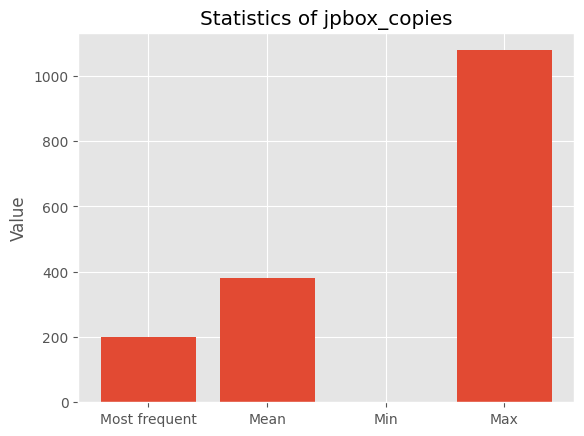

In [ ]:
# Remplacer les Nan par 0 dans actor_celebs, all_director_oscars, all_actor_oscars	

df['actor_celebs'].fillna(0)
df['all_director_oscars'].fillna(0)
df['all_actor_oscars'].fillna(0)
df['actor_celebs_by_year'].fillna(0)


#Supp les Nan 
columns_to_dropna = ['entries_mean_actor', 'entries_sum_actor', 'entries_mean_director', 
                     'entries_sum_director', 'entries_mean_composer', 'entries_sum_composer']

for column in columns_to_dropna:
    df.dropna(subset=[column], inplace=True)

# colonne jpbox
column_to_analyze = 'jpbox_copies'

# Calcul des statistiques
most_frequent_value = df['jpbox_copies'].mode()[0]
mean_value = df['jpbox_copies'].mean()
min_value = df['jpbox_copies'].min()
max_value = df['jpbox_copies'].max()

# Création du graphique
plt.bar(['Most frequent', 'Mean', 'Min', 'Max'], [most_frequent_value, mean_value, min_value, max_value])
plt.title(f'Statistics of {column_to_analyze}')
plt.ylabel('Value')
plt.show()

#conlusion : imputer avec most frequent
# Créer un imputeur avec une stratégie de remplissage
imputer = SimpleImputer(strategy='most_frequent')

# Sélectionnez la colonne à imputer
X_impute = df[['jpbox_copies']]

# Imputez les valeurs manquantes dans la colonne 'jpbox_copies' avec la médiane
X_imputed = imputer.fit_transform(X_impute)

# Remplacez les valeurs imputées dans le dataframe
df['jpbox_copies'] = X_imputed


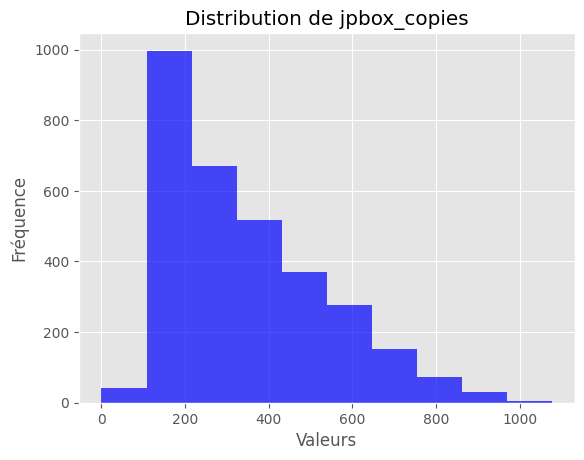

In [ ]:
# Supposez que vous voulez visualiser la distribution de la colonne "colonne_a_visualiser"
plt.hist(df["jpbox_copies"], bins=10, color='blue', alpha=0.7)
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.title("Distribution de jpbox_copies")
plt.show()


In [ ]:
df.isnull().sum()

id_allocine                 0
title                       0
release_year                0
original_title           3132
genres                      0
duration_m                  0
synopsis                    0
poster_link                 0
release_date                0
societies                   0
budget                      0
nationality                 0
directors                   0
all_director_oscars      3122
all_actor_oscars         2602
actor_celebs             2709
actor_celebs_by_year     2207
entries_mean_actor          0
entries_sum_actor           0
entries_mean_director       0
entries_sum_director        0
entries_mean_composer       0
entries_sum_composer        0
jpbox_copies                0
entries                     0
dtype: int64

### Nombre de films sorties / an 

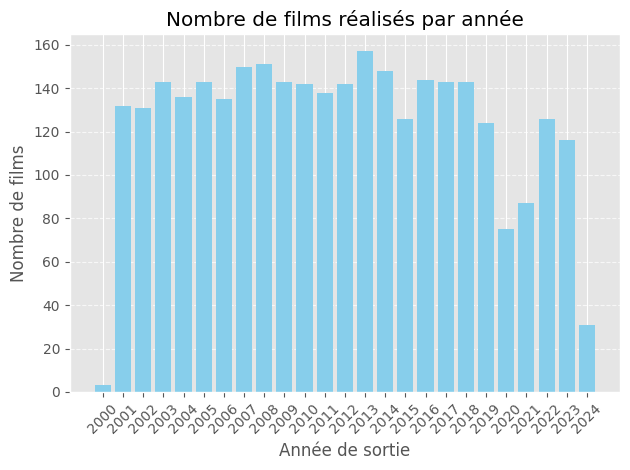

In [ ]:
df_filtered = df[df['release_year'] >= 2000]

films_par_annee = df_filtered['release_year'].value_counts().sort_index()

# Créer un histogramme
plt.bar(films_par_annee.index, films_par_annee.values, color='skyblue')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films réalisés par année')
plt.xticks(films_par_annee.index, rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille en arrière-plan
plt.tight_layout()  # Ajuster la disposition pour éviter la superposition des étiquettes
plt.show()

### Nombres d'entrées pour les 10 meilleurs films 

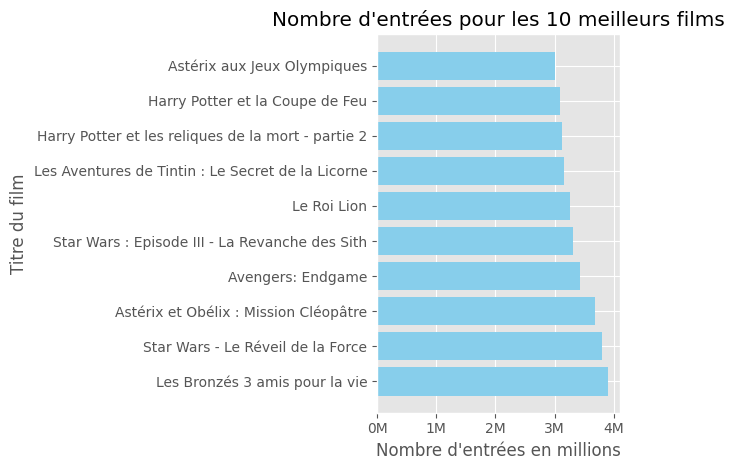

In [ ]:

# Sélectionner les 10 films avec le plus grand nombre d'entrées
top_10_films = df.nlargest(10, 'entries')

# Créer un histogramme du nombre d'entrées pour les 10 meilleurs films
plt.barh(top_10_films['title'], top_10_films['entries'], color='skyblue')  # Utilisation de barh pour inverser les axes
plt.xlabel('Nombre d\'entrées en millions')  # Inversion de l'étiquette de l'axe des x
plt.ylabel('Titre du film')  # Inversion de l'étiquette de l'axe des y
plt.title('Nombre d\'entrées pour les 10 meilleurs films')

# Formatter les étiquettes de l'axe des abscisses pour afficher les valeurs en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))
plt.tight_layout()
plt.show()

### Nationalité du film pour les 10 meilleurs films 

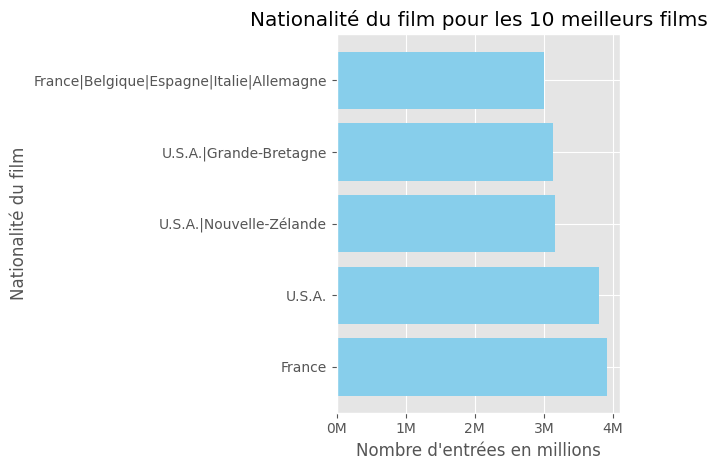

In [ ]:
# nationality

# Sélectionner les 10 films avec le plus grand nombre d'entrées
top_10_films = df.nlargest(10, 'entries')

# Créer un histogramme du nombre d'entrées pour les 10 meilleurs films
plt.barh(top_10_films['nationality'], top_10_films['entries'], color='skyblue')  # Utilisation de barh pour inverser les axes
plt.xlabel('Nombre d\'entrées en millions')  # Inversion de l'étiquette de l'axe des x
plt.ylabel('Nationalité du film')  # Inversion de l'étiquette de l'axe des y
plt.title('Nationalité du film pour les 10 meilleurs films')

# Formatter les étiquettes de l'axe des abscisses pour afficher les valeurs en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))

plt.tight_layout()
plt.show()

### Analyse de la colonne 'genre'

In [ ]:
# nombre de valeurs uniques pour la colonne genre

df['genres'].nunique()


364

### Nettoyage des colonnes actor_celebs, all_director_oscars, all_actor_oscars

### Analyse de la colonne 'directors'

In [ ]:
#  valeurs uniques pour directors

df['directors'].nunique()

1467

In [ ]:
# Films par réalisateurs   

films_par_realisateur = df['directors'].value_counts()
films_par_realisateur

directors
Woody Allen                     18
Steven Spielberg                17
Ridley Scott                    16
Clint Eastwood                  14
François Ozon                   14
                                ..
Claude-Michel Rome               1
Olivier Doran                    1
Jennifer Flackett,Mark Levin     1
Ken Kwapis                       1
Philippe Pollet-Villard          1
Name: count, Length: 1467, dtype: int64

In [ ]:
# top 50 des réalisateurs en proportion de films réalisés

top_50_realisateurs = films_par_realisateur.head(50)
top_50_realisateurs

directors
Woody Allen             18
Steven Spielberg        17
Ridley Scott            16
Clint Eastwood          14
François Ozon           14
Steven Soderbergh       12
Antoine Fuqua           11
M. Night Shyamalan      10
Christopher Nolan       10
Michael Bay             10
Anne Fontaine           10
Olivier Baroux          10
Tim Burton              10
Eric Lavaine            10
Ron Howard               9
Patrice Leconte          9
Cédric Klapisch          9
Bruno Podalydès          9
Jean Becker              9
Yvan Attal               8
Fabien Onteniente        8
Jean-François Richet     8
Robert Rodriguez         8
David Yates              8
Guy Ritchie              8
André Téchiné            8
Luc Besson               8
Jean-Pierre Améris       8
Wes Anderson             8
Peter Jackson            8
Martin Scorsese          8
Francis Lawrence         8
Quentin Dupieux          8
Claude Lelouch           8
Shawn Levy               8
David Cronenberg         7
Todd Phillips     

### Titres et années de sortie des derniers films des 5 réalisateurs qui ont produit le plus de films

In [ ]:

top_5_realisateurs = films_par_realisateur.head(5)

derniers_films = []
for realisateur in top_5_realisateurs.index:
    dernier_film = df[df['directors'] == realisateur].sort_values(by='release_year', ascending=False).iloc[0]
    derniers_films.append((realisateur, dernier_film['title'], dernier_film['release_year']))

# Trier les résultats par année de sortie du dernier film
derniers_films.sort(key=lambda x: x[2])

# Afficher chaque élément de la liste sur une ligne distincte
for film in derniers_films:
    print(film)



('Woody Allen', 'Un jour de pluie à New York', 2019)
('Clint Eastwood', 'Cry Macho', 2021)
('Steven Spielberg', 'The Fabelmans', 2023)
('Ridley Scott', 'Napoléon', 2023)
('François Ozon', 'Mon Crime', 2023)


### Acteurs qui ont le plus joué

In [ ]:
# # les trois colonnes 'start1', 'start2' et 'start3' en une seule série
# start_combined = pd.concat([df['start1'], df['start2'], df['start3']])

# # le nombre d'occurrences de chaque valeur combinée
# top_start_combined = start_combined.value_counts()

# # les valeurs combinées qui reviennent le plus souvent
# print("Les valeurs combinées qui reviennent le plus souvent :")
# print(top_start_combined.head(25))

### Relations entre directors et genres

In [ ]:

# hypothèse nulle: pas de relation 
# hypothèse alternative: il y a relations entre les variables

In [ ]:
# relation entre les genres de film et directors

colonne1 = df['directors']
colonne2 = df['genres']

# Créer un tableau de contingence à partir des colonnes catégorielles
contingence_table = pd.crosstab(colonne1, colonne2)

# Effectuer le test du chi2 d'indépendance
chi2, p_value, dof, expected = chi2_contingency(contingence_table)

# Afficher le résultat du test
print("Chi2:", chi2)
print("P-value:", p_value)


Chi2: 560180.9514128093
P-value: 2.289291827399879e-157


In [ ]:
# # relation entre les genres de casting et directors

# colonne1 = df['directors']
# colonne2 = df['start1']

# # Créer un tableau de contingence à partir des colonnes catégorielles
# contingence_table = pd.crosstab(colonne1, colonne2)

# # Effectuer le test du chi2 d'indépendance
# chi2, p_value, dof, expected = chi2_contingency(contingence_table)

# # Afficher le résultat du test
# print("Chi2:", chi2)
# print("P-value:", p_value)

### Relation entre genres et entries

In [ ]:


# Séparer les données en groupes pour chaque genre de film
grouped_data = [df[df['genres'] == genre]['entries'] for genre in df['genres'].unique()]

# Appliquer le test ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("P-value :", p_value)



P-value : 4.487802917187297e-77


### Relation entre societies et entries

In [ ]:
# Séparer les données en groupes pour chaque genre de film
grouped_data = [df[df['societies'] == genre]['entries'] for genre in df['societies'].unique()]

# Appliquer le test ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("P-value :", p_value)

P-value : 0.991726094248599


### Merge les deux csv 

In [ ]:
df_budget = pd.read_csv('EDA/DBa_to_csv/film.csv')


df['budget'].nunique()


#Nombre de zéro dans df 
zero_budget_rows = df[df['budget'] == '0']
nombre_lignes = zero_budget_rows.shape[0]
print(nombre_lignes)

1464


In [ ]:


#Nettoyage des années 

# Fonction pour supprimer les parenthèses et les années
def remove_parentheses_and_years(film_title):
    return re.sub(r'\([^()]*\)', '', film_title)

# Appliquer la fonction à la colonne 'film'
df_budget['film'] = df_budget['film'].apply(remove_parentheses_and_years)

In [ ]:
from fuzzywuzzy import fuzz

# Identifier les correspondances approximatives
# Utiliser la similarité de Levenshtein pour calculer la similitude entre les titres et les films
# Exemple: fuzzywuzzy

def find_matching_titles(title, films):
    for film in films:
        if fuzz.partial_ratio(title, film) >= 90:  # Ajustez ce seuil selon vos besoins
            return film
    return None

df['film_match'] = df['title'].apply(lambda x: find_matching_titles(x, df_budget['film']))

/home/utilisateur/Documents/dev_ia/NIAB/venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
df.head(50)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,...,actor_celebs_by_year,entries_mean_actor,entries_sum_actor,entries_mean_director,entries_sum_director,entries_mean_composer,entries_sum_composer,jpbox_copies,entries,film_match
0,5818,Titanic,1998,NaN,"Drame,Romance",194,"Southampton, 10 avril 1912. Le paquebot le plu...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-01-07,Industrial Light & Magic (ILM)|Paramount Pictu...,...,38.0,1668807.0,164059823.0,0.0,0.0,0.0,0.0,564.0,498212,Titanic
1,7118,Les convoyeurs attendent,1999,NaN,Comédie dramatique,94,Roger Closset habite un petit pavillon de la b...,https://fr.web.img2.acsta.net/c_310_420/pictur...,1999-09-15,Centre de Cinéma et de l'Audiovisuel de la Com...,...,NaN,775627.0,47313249.0,0.0,0.0,0.0,0.0,80.0,52649,None
3,10675,Cornouaille,2012,NaN,Drame,96,Odile est une jeune femme indépendante et rati...,https://fr.web.img6.acsta.net/c_310_420/medias...,2012-08-15,France 2 Cinéma|TF1 International|Move Movie|U...,...,NaN,621202.0,36223933.0,0.0,0.0,0.0,0.0,220.0,128162,None
4,10862,Le Roi Lion,1994,NaN,"Aventure,Animation,Famille,Comédie musicale",89,Sur les Hautes terres d’Afrique règne un lion ...,https://fr.web.img6.acsta.net/c_310_420/pictur...,1994-11-23,Gaumont Buena Vista International (GBVI)|IMAX ...,...,6.0,937339.0,177600948.0,0.0,0.0,0.0,0.0,199.0,210904,Le Roi Lion
6,12791,La Planète des singes,1968,NaN,"Drame,Science Fiction",110,"Egaré dans l'espace-temps, un engin spatial am...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1968-04-26,APJAC Productions|Swashbuckler Films|20th Cent...,...,NaN,1739324.0,90444823.0,0.0,0.0,0.0,0.0,199.0,175773,La Planète des singes - Suprématie
7,15681,Rencontre avec le dragon,2003,NaN,Aventure,109,"Félix a quinze ans. C'est encore un enfant, pa...",https://fr.web.img3.acsta.net/c_310_420/medias...,2003-08-06,France 3 Cinéma|Diaphana Films,...,12.0,512848.0,121997606.0,0.0,0.0,0.0,0.0,218.0,77178,None
8,16591,Madagascar,2005,NaN,"Comédie,Aventure,Animation",86,"Lorsqu'un lion, un zèbre, une girafe, un hippo...",https://fr.web.img4.acsta.net/c_310_420/medias...,2005-06-22,United International Pictures (UIP)|DreamWorks...,...,NaN,879937.0,259377100.0,0.0,0.0,0.0,0.0,846.0,874013,Les Pingouins de Madagascar
9,18478,Mary à tout prix,1998,NaN,Comédie,119,"Ted, le",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-11-11,Les Acacias|20th Century Studios,...,NaN,694231.0,68653635.0,0.0,0.0,0.0,0.0,199.0,573347,None
10,18524,Le Masque de Zorro,1998,NaN,"Romance,Aventure,Action",136,"Après vingt ans de prison, Don Diego de La Veg...",https://fr.web.img3.acsta.net/c_310_420/medias...,1998-10-14,Zorro Productions|TriStar Pictures|Amblin Ente...,...,9.0,758808.0,85601662.0,0.0,0.0,0.0,0.0,595.0,226753,Le Masque de Zorro
11,18598,Il faut sauver le soldat Ryan,1998,NaN,"Drame,Guerre",163,Alors que les forces alliées débarquent à Omah...,https://fr.web.img6.acsta.net/c_310_420/medias...,1998-09-30,Mutual Film Company|Paramount Pictures|DreamWo...,...,38.0,859983.0,135091688.0,0.0,0.0,0.0,0.0,581.0,165808,Il faut sauver le soldat Ryan


In [ ]:
df[['title', 'film_match']]

,title,film_match
0,Titanic,Titanic
1,Les convoyeurs attendent,None
3,Cornouaille,None
4,Le Roi Lion,Le Roi Lion
6,La Planète des singes,La Planète des singes - Suprématie
...,...,...
3780,14 jours pour aller mieux,None
3781,Heureux gagnants,None
3782,Inestimable,None
3784,Le Royaume de Kensuke,None


In [ ]:
nombre_none = df['film_match'].isnull().sum()
nombre_none

# Fusionner les datasets en utilisant les correspondances trouvées comme clé de fusion
merged_data = pd.merge(df, df_budget, how='left', left_on='film_match', right_on='film')
merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
df_merged = pd.read_csv('merged_data.csv')

df_merged[['title', 'budget_x', 'budget_y']].head(100)

# Sélectionner les lignes où 'budget_x' est égal à '0' et 'budget_y' n'est pas NaN
resultats = df_merged.query("budget_x == '0' and budget_y.notnull()")['title']

# Afficher les titres correspondants
print(resultats)

101                            Ali
113                          Irène
132     Le Baiser mortel du dragon
187                     Scooby-Doo
228                      Le Boulet
                   ...            
3099                  Le Challenge
3112                   Equalizer 3
3113                     La Petite
3115                     Scream VI
3135               Kung Fu Panda 4
Name: title, Length: 298, dtype: object


In [ ]:
# Remplacer les valeurs '0' dans la colonne 'budget_x' par les valeurs de la colonne 'budget_y' lorsque 'budget_y' n'est pas None
df_merged['budget_x'] = df_merged.apply(lambda row: row['budget_y'] if row['budget_x'] == '0' and row['budget_y'] is not None else row['budget_x'], axis=1)


In [ ]:
df_merged.head()

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,...,entries_sum_actor,entries_mean_director,entries_sum_director,entries_mean_composer,entries_sum_composer,jpbox_copies,entries,film_match,film,budget_y
0,5818,Titanic,1998,NaN,"Drame,Romance",194,"Southampton, 10 avril 1912. Le paquebot le plu...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-01-07,Industrial Light & Magic (ILM)|Paramount Pictu...,...,164059823.0,0.0,0.0,0.0,0.0,564.0,498212,Titanic,Titanic,200 000 000 $
1,7118,Les convoyeurs attendent,1999,NaN,Comédie dramatique,94,Roger Closset habite un petit pavillon de la b...,https://fr.web.img2.acsta.net/c_310_420/pictur...,1999-09-15,Centre de Cinéma et de l'Audiovisuel de la Com...,...,47313249.0,0.0,0.0,0.0,0.0,80.0,52649,NaN,NaN,NaN
2,10675,Cornouaille,2012,NaN,Drame,96,Odile est une jeune femme indépendante et rati...,https://fr.web.img6.acsta.net/c_310_420/medias...,2012-08-15,France 2 Cinéma|TF1 International|Move Movie|U...,...,36223933.0,0.0,0.0,0.0,0.0,220.0,128162,NaN,NaN,NaN
3,10862,Le Roi Lion,1994,NaN,"Aventure,Animation,Famille,Comédie musicale",89,Sur les Hautes terres d’Afrique règne un lion ...,https://fr.web.img6.acsta.net/c_310_420/pictur...,1994-11-23,Gaumont Buena Vista International (GBVI)|IMAX ...,...,177600948.0,0.0,0.0,0.0,0.0,199.0,210904,Le Roi Lion,Le Roi Lion,250 000 000 $
4,10862,Le Roi Lion,1994,NaN,"Aventure,Animation,Famille,Comédie musicale",89,Sur les Hautes terres d’Afrique règne un lion ...,https://fr.web.img6.acsta.net/c_310_420/pictur...,1994-11-23,Gaumont Buena Vista International (GBVI)|IMAX ...,...,177600948.0,0.0,0.0,0.0,0.0,199.0,210904,Le Roi Lion,Le Roi Lion,45 000 000 $
